In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
fmnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
#Autoencoder
autoencoder_input = keras.Input(shape=(28, 28, 1))

In [6]:
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(autoencoder_input)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

In [7]:
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [8]:
autoencoder = keras.Model(autoencoder_input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [9]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 63s 71ms/step - loss: 0.0390 - val_loss: 0.0124
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 72ms/step - loss: 0.0119 - val_loss: 0.0105
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 70ms/step - loss: 0.0103 - val_loss: 0.0095
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 59s 70ms/step - loss: 0.0094 - val_loss: 0.0088
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 63s 74ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 61s 72ms/step - loss: 0.0075 - val_loss: 0.0072
Epoch 9/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 73ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 10/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - loss: 0.0070 - val_loss: 0.0068


In [10]:
encoder = keras.Model(autoencoder_input, encoded)
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [11]:
x_train_encoded_flat = x_train_encoded.reshape(len(x_train_encoded), -1)
x_test_encoded_flat = x_test_encoded.reshape(len(x_test_encoded), -1)

In [13]:
#TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
x_train_tsne = tsne.fit_transform(x_train_encoded_flat)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


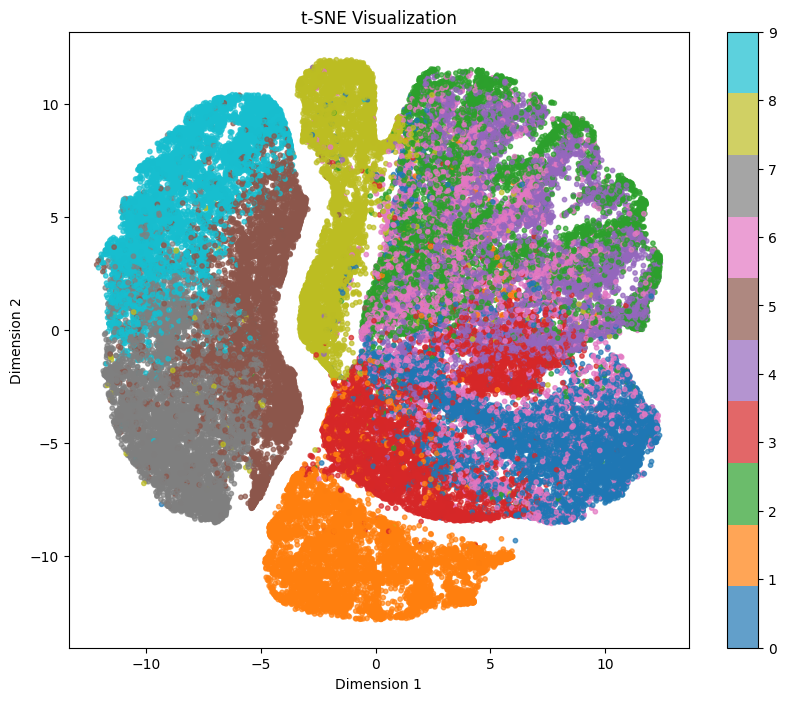

In [15]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=y_train, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter)
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [16]:
#Supervised learning
classifier_input = keras.Input(shape=(7, 7, 8))
x = layers.Flatten()(classifier_input)
x = layers.Dense(64, activation='relu')(x)
classifier_output = layers.Dense(10, activation='softmax')(x)

In [17]:
classifier = keras.Model(classifier_input, classifier_output)
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
#Training
history = classifier.fit(x_train_encoded, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7034 - loss: 0.8555 - val_accuracy: 0.8313 - val_loss: 0.4689
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8423 - loss: 0.4364 - val_accuracy: 0.8365 - val_loss: 0.4472
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8565 - loss: 0.4019 - val_accuracy: 0.8640 - val_loss: 0.3844
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8672 - loss: 0.3731 - val_accuracy: 0.8603 - val_loss: 0.3902
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8684 - loss: 0.3622 - val_accuracy: 0.8683 - val_loss: 0.3669
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8744 - loss: 0.3474 - val_accuracy: 0.8770 - val_loss: 0.3459
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8773 - loss: 0.3363 - val_accuracy: 0.8663 - val_loss: 0.3748
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8766 - loss: 0.3347 - val_accuracy: 0.

In [20]:
#Evaluation of the model
test_loss, test_acc = classifier.evaluate(x_test_encoded, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8792 - loss: 0.3415
Test accuracy: 0.8757


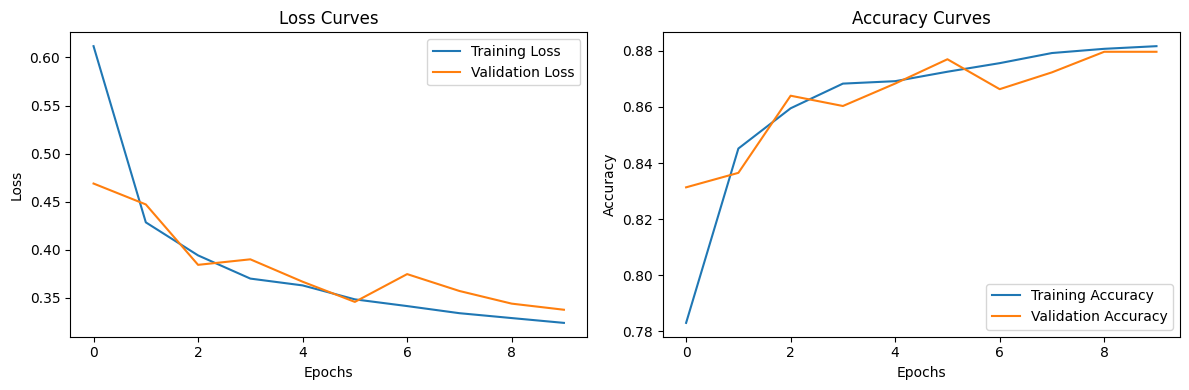

In [22]:
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()





313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


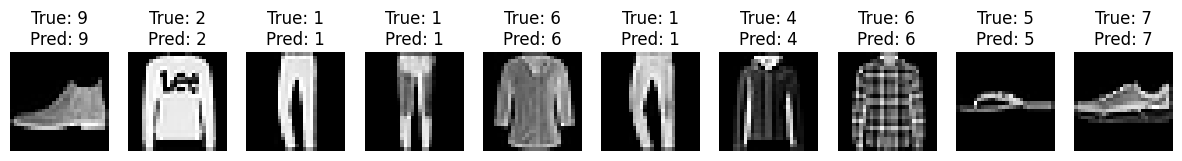

In [24]:
# prediction and results
y_pred = np.argmax(classifier.predict(x_test_encoded), axis=1)


# Display some correct and incorrect predictions
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    plt.axis('off')
plt.show()